# Аналитика в сети фитнес-центров «Культурист-датасаентист»

Задача — провести анализ и подготовить план действий по удержанию клиентов, чтобы предотвратить отток клиентов.


Для этого нужно выполнить следующие пункты:

- спрогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами.

Для анализа предаставлена таблица gym_churn, которая содержат данные на месяц до оттока и факт оттока на определённый месяц. 

Набор данных включает следующие поля:
- 'Churn' — факт оттока в текущем месяце;

Текущие поля в датасете:
Данные пользователя за предыдущий до проверки факта оттока месяц:
- 'gender' — пол
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
- 'Phone' — наличие контактного телефона
- 'Age' — возраст
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах)
- 'Group_visits' — факт посещения групповых занятий
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон

## Содержание

[Библиотеки](#library)

1. [Общая информация о данных](#information)
2. [Исследовательский анализ данных (EDA)](#analytic)
    1. [Общее исследование признаков](#general_features)
    2. [Исследование по группам средних значений признаков](#group_avg_features)
    3. [Исследование распределений признаков по группам](#group_distribution_features)
    4. [Матрица корреляций](#corr)   
3. [Модель прогнозирования оттока пользователей](#model)
    1. [Построение модели бинарной классификации пользователей](#binary_classification)        
        1. [Логистическая регрессия](#logistic_regression)
        2. [Случайный лес](#random_forest)
    2. [Оценки метрик: accuracy, precision и recall](#metric)
        1. [Логистическая регрессия](#metric_logistic_regression)
        2. [Случайный лес](#metric_random_forest)
4. [Kластеризация пользователей](#claster)
    1. [Построение дендограммы](#dendrogramma)
    2. [Кластеризации на основании алгоритма K-Means](#K_means)
    3. [Исследование признаков кластеров](#features_claster)
    4. [Доля оттока](#exit)    
    
[Общий вывод и рекомендации](#conclusion)

## Библиотеки  <a id="library"></a>

In [1]:
#для работы с файлом и данными подключим библиотеку pandas 
import pandas as pd
#импортируем библиотеку matplotlib.pyplot для построения графиков
import matplotlib.pyplot as plt
#для построения более сложных и красивых графиков импортируем seaborn
import seaborn as sns
#для построения модели бинарной классификации методом логистической регрессия
from sklearn.linear_model import LogisticRegression
#для построения модели бинарной классификации методом случайный лес
from sklearn.ensemble import RandomForestClassifier
#для кластеризации пользователей используем метод K-means
from sklearn.cluster import KMeans
#для стандартиации признаков используем StandardScaler из sklearn.preprocessing 
from sklearn.preprocessing import StandardScaler
#для деления данных на обучающую и вилидационную выборки применяем train_test_split из sklearn.model_selection
from sklearn.model_selection import train_test_split
#для рассчёта метрик 
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
#для построения дендрограммы импортируем dendrogram, linkage
from scipy.cluster.hierarchy import dendrogram, linkage

## 1. Общая информация о данных  <a id="information"></a>

In [2]:
#для прочтения файла применяем метод read_csv() библиотеки pandas
gym_churn=pd.read_csv('/datasets/gym_churn.csv')

In [3]:
#исследуем общую информацию методом info()
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [4]:
gym_churn.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

### Вывод

Как видно пропущенных значений в данных, что очень хорошо. А также нету категориальных переменных, что упростит преподготовку данных перед построением модель.

## 2. Исследовательский анализ данных (EDA) <a id="analytic"></a>

### 2.1 Общее исследование признаков <a id="general_features"></a>

In [5]:
#создаём цикл по всем признакам данных о клиентов
#для этого исключаем целевую переменную из gym_churn методом drop('Churn', axis=1) 
for predict in  gym_churn.drop('Churn', axis=1):
    #задаём название признака
    print('Описание признака: ',predict)
    #описываем каждый признак методом describe()
    print(gym_churn[predict].describe())
    #просматриваем уникальные значения 
    print(gym_churn[predict].unique())

Описание признака:  gender
count    4000.000000
mean        0.510250
std         0.499957
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: gender, dtype: float64
[1 0]
Описание признака:  Near_Location
count    4000.000000
mean        0.845250
std         0.361711
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Near_Location, dtype: float64
[1 0]
Описание признака:  Partner
count    4000.000000
mean        0.486750
std         0.499887
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Partner, dtype: float64
[1 0]
Описание признака:  Promo_friends
count    4000.000000
mean        0.308500
std         0.461932
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Promo_friends, dtype: float64
[1 0]
Описание признака:  Phone
count    4000.000000
mea

- gender имеет среднее равное 0.51 при медиане равной 1.0 и со стандартным отклонением 0.499, что свидетельствует о примерно равном делении по гендеру: но 1 чуть больше, чем 0.
- Near_Location имеет среднее равное  0.845 при медиане и 25% квартиле равными 1.0 и со стандартным отклонением 0.362, что говорит о том, что больше половины (больше 3/4) клиентов- люди, которые живут или работают рядом c фитнессом.
- Partner имеет среднее равное 0.487 при медиане равной 0.0 и со стандартным отклонением 0.499, что свидетельствует о том что чуть больше половины клиентов-люди, у которых роботадатели не являются партнёрами фитнесс-центра.
- Promo_friends имеет низкое среднее 0.3085 при медиане равной 0.0 и со стандартным отклонением 0.462, что также свидельствует о том что 0 больше чем 1, а следовательно только около 1/3 клиентов пришли с акцией "друг".
- Phone имеет среднее равное   0.9035 при медиане и 25% квартиле равными 1.0 и со стандартным отклонением 0.295, что говорит о том, что больше половины (больше 3/4) клиентов- люди, которые живут или работают рядом c фитнессом, причем раброс очень слабый.
- Contract_period имеет среднее равное 4.68 месяца при стандартном отклоненнии 4.55 и медиане равной 1 месяцу. Описание признака отражает,что многие пользователи берут абонементы на месяц, и только 25%берут от полугода и больше.
- Group_visits имеет среднее равное  0.41 при стандартном отклоненнии равном 0.49,  что свидетельствует о том, что чуть больше половины клиентов-люди, которые не ходят на групповые занятия.
- Age имеет средий возраст в районе 29 лет при отклоненнии в 3,26 года, причем медиана также равна 29 лет. Следовательно половина клиентов- от 18 до 29 лет, а вторая половина от 30 до 41 года.
- Avg_additional_charges_total имеет среднее равное 146.94 при стандартном отклонении 96.36. Медиана чуть меньше среднего а стандартное отклонении имеют довольно большую величину, что говорит,что есть не большая группа людей, которая порой тратить много денег (максимум 552).
- Month_to_end_contract имеет среднее равное 4.32 при стандартном отклонении 4.19. Медиана, так же как и для абонементов равна 1 месяцу, так как большиснтво имеет абонемент в 1 месяц,то и остается им дохаживать этот месяц.
- Lifetime имеет в среднем 3.72 с стандартным отклонением 3.75 пр медиане 3 месяца. Следовательно, половина пользователей пришла повторно в этот фитнесс центр, так как опять же у больше половины абонементы всего на месяц
-  Avg_class_frequency_total имеет среднее  равное 1.88 и стандартным отклонением 0.97 при медиане 1.83. То есть обычно люди ходят не больше 2х дней в неделю, но бывают и выбросы в 5-6 раз за неделю.
- Avg_class_frequency_current_month имеет среднее равное 1.76 и стандартным отклонением 1.52 при медиане 1.72. То есть в среднем за последний месяц люди также ходили от 1 до 2 раз в неделю, но уже чуть реже,чем в течении всего времени действия аюонемента.

### 2.2 Исследование по группам средних значений признаков <a id="group_avg_features"></a>

In [6]:
#однако нужно незабывать про парадокс Симпсона, когда деление на группы отражают совсем иную картину статистики и распределений
#поэтому посмотрите на средние значения признаков, аналогично предыдущему пункту, но с учетом групп
#тех, кто ушел в отток и тех, кто остался 
for predict in  gym_churn.drop('Churn', axis=1):
    #задаём название признака
    print('Описание признака: ',predict)
    #описываем каждый признак методом describe()
    print(gym_churn.groupby('Churn')[predict].mean())
    #просматриваем уникальные значения 
    print(gym_churn[predict].unique())

Описание признака:  gender
Churn
0    0.510037
1    0.510839
Name: gender, dtype: float64
[1 0]
Описание признака:  Near_Location
Churn
0    0.873086
1    0.768143
Name: Near_Location, dtype: float64
[1 0]
Описание признака:  Partner
Churn
0    0.534195
1    0.355325
Name: Partner, dtype: float64
[1 0]
Описание признака:  Promo_friends
Churn
0    0.353522
1    0.183789
Name: Promo_friends, dtype: float64
[1 0]
Описание признака:  Phone
Churn
0    0.903709
1    0.902922
Name: Phone, dtype: float64
[0 1]
Описание признака:  Contract_period
Churn
0    5.747193
1    1.728558
Name: Contract_period, dtype: float64
[ 6 12  1]
Описание признака:  Group_visits
Churn
0    0.464103
1    0.268615
Name: Group_visits, dtype: float64
[1 0]
Описание признака:  Age
Churn
0    29.976523
1    26.989632
Name: Age, dtype: float64
[29 31 28 33 26 34 32 30 23 27 35 25 36 24 21 37 22 19 20 38 39 18 41]
Описание признака:  Avg_additional_charges_total
Churn
0    158.445715
1    115.082899
Name: Avg_additional_

- gender и Phone имеют одинаковые средние, а значит пол и наличие телефона скорее всего не влияют на отток.

Для остальных признаков видна разница между средними значениями.

- Средние Age слабо отличаются друг от друга и данные возраста находятся в одной категории, поэтому этот признак также вряд ли влияет на отток (средние равны 30 лет - для тех,что не ушли и 27 лет-для тех,что ушли).

- В признаках Near_Location, Partner, Group_visits и Promo_friends для людей, которые не собираются уходить, 1 больше, чем для людей, которые собирались уходить. Причем в Near_Location в обоих группах преобладают 1 над 0 (средние равны 0.87 и 0.77). В Partner 1 немного преобладают над 0 для группы людей не в оттоке в то время как для людей,собирающихся уходить, этот показатель меньше в 1.5 раза (средние равны соответсвенно 0.53 и 0.355). В Promo_friends разница между средними также в 1.5 раза, но уже для обоих групп преобладают 0 над 1 (средние равны 0.35 и 0.18). А в Group_visits ситуация чуть мягче 0 немного преобладают для людей,что не собирались уходить, но значительно сильно идёт перевес в сторону 0 для людей,что в итоге  ушли(средние равны 0.46 и 0.27).
- Contract_period имеет средние равные 5.75 и 1.73 То есть люди, которые не собираются уходить обычно берут долгосрочные абонементы(от полугода) и намного реже берут одномесячные абонементы, в то время как для людей,что ушли с фитнесс-центра, абонементы обычно были длинной в один месяц. Аналогичные средние имеет Month_to_end_contract (средние равны соответсвенно 5.28 и 1.66), так как эти два признака взаимосвязаны, поэтому в будущем надо будет исключить один из них.
-  Avg_class_frequency_total и Avg_class_frequency_current_month имеет также близкие средние значения при группировках, что похоже снова же на взаимосвязь признаков, а следовательно какой-то из них можно будет не учитывать. Причем число посещений при оттоке в 2 раза меньше: без оттока люди стабильно ходят 2 раза в неделю, а при оттоке 1 день в лучшем случае.
- Avg_additional_charges_total имеет средние равные 158.4 и 115.08 , то есть люди,что собирались уходить в следующем месяцы в среднем тратят меньше.
- Lifetime имее средние равные 4.71 и 0.99 месяцев, а значит обычно уходят новички сети.

### 2.3 Исследование распределений признаков по группам <a id="group_distribution_features"></a>

Описание признака:  gender


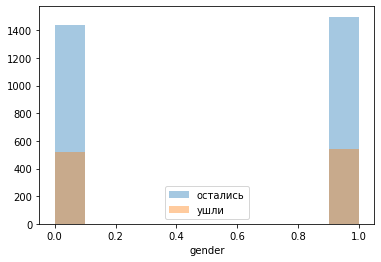

Описание признака:  Near_Location


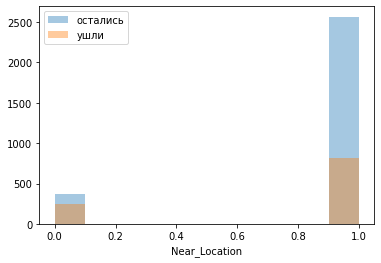

Описание признака:  Partner


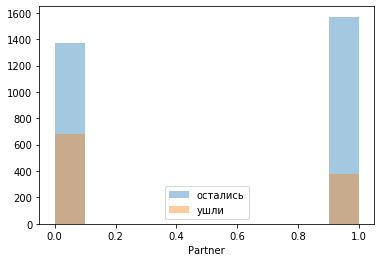

Описание признака:  Promo_friends


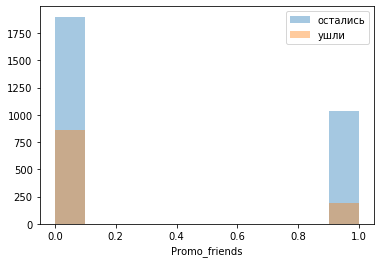

Описание признака:  Phone


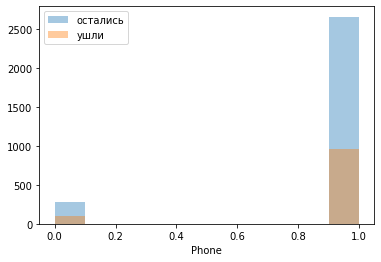

Описание признака:  Contract_period


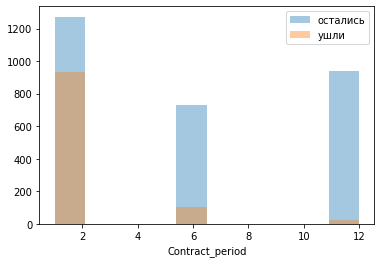

Описание признака:  Group_visits


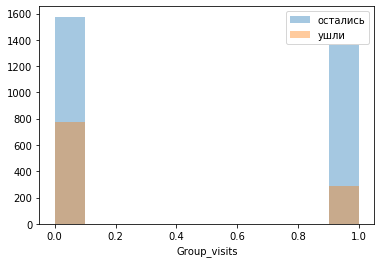

Описание признака:  Age


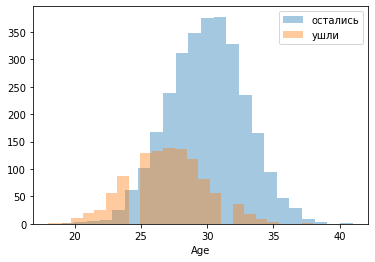

Описание признака:  Avg_additional_charges_total


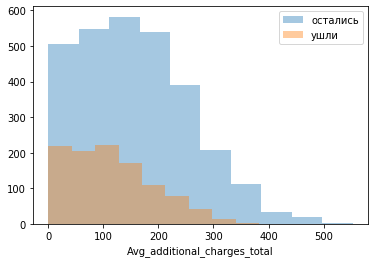

Описание признака:  Month_to_end_contract


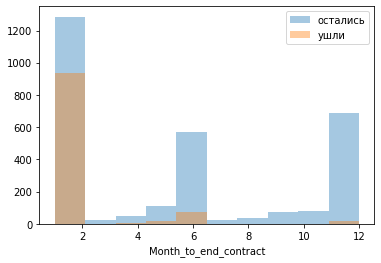

Описание признака:  Lifetime


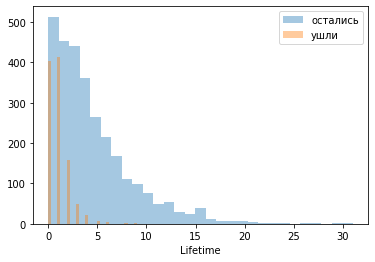

Описание признака:  Avg_class_frequency_total


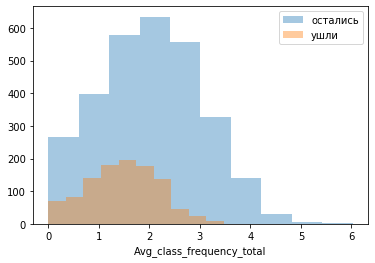

Описание признака:  Avg_class_frequency_current_month


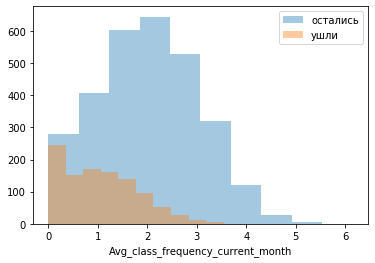

In [7]:
#Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)
#чтобы взглянуть на данные более глубоко и оценить масштаб значений и форму распределний.
#для построения графиков применяем метод sns.distplot() с указанием bins=gym_churn[predict].nunique() для целочислен. признаков,
#так форма будет реально отражать ситуацию
for predict in  gym_churn.drop('Churn', axis=1):
    #задаём название признака
    print('Описание признака: ',predict)
    #строим распределение   
    if gym_churn[predict].dtype == 'int64' and gym_churn[predict].nunique()>5:        
        group_0=gym_churn[gym_churn['Churn']==0][predict]
        plt.figure()
        sns.distplot(group_0, bins=gym_churn[predict].nunique(), kde=False, label="остались")
        group_1=gym_churn[gym_churn['Churn']==1][predict]
        sns.distplot(group_1, bins=gym_churn[predict].nunique(), kde=False, label="ушли")
        plt.legend()
        plt.show()
    else:
        plt.figure()
        group_0=gym_churn[gym_churn['Churn']==0][predict]
        sns.distplot(group_0, kde=False, bins=10, label="остались")
        group_1=gym_churn[gym_churn['Churn']==1][predict]
        sns.distplot(group_1,kde=False,  bins=10, label="ушли")
        plt.legend()
        plt.show()


Описание предыдущих двух пунктов подтвердилось видами распределений. Половина признаков оказились бинарными и состоят только из 1 и 0. Остальные распределния напоминают нормальное распределние, либо в распределениях присутствуют перекосы/сдвиги данных в одну из сторон. 

- Видно,что пропорциональное соотношение колличества пользователей по уникальным значениям призннаков gender и phone сохраняется для обох групп. 1 намного сильнее приобладают, чем 0 в случае phone и примерное равное соотношение при распределении gender.
- В Near_Location намного больше 1 в группе пользователей, что остались в сети, по сравнению с пользователями,что покинули сеть, в то время как отличие для 0 между группами намного слабже наблюдается.
- Promo_friends отражает похожую ситуацию Near_Location, только для обоих групп 0 больше, чем 1. 
- В Group_visits также 0 больше, чем 1, но для группы "ушли" пропорциональное соотношение 1 и 0 будет преобладать над пропорциональным соотношением группы "остались". 
- В Partner наблюдается подмена сценария распределения: в то время как для группы "оставшихся" 1 чуть больше приобладают над 0, в группе "ушли" 0 преобладают над 1.
- Contact_period нельзя уже назвать бинарным, так как данный признак имеет 3 категории, а не 2. Причем для группы "оставшихся" больше всего людей берут абонементы на 1 месяц, потом на год, и меньше всего на полгода, однако отличие между категориями в это группе не такое значительное, как в группе 'ушли'. В группе "ушли" наблюдается чёткая иерархия: почти все брали абонемент на 1 месяц, немногие брали на 6 месяцев и единицы, кто взял на весь год.
- Month_to_end_contract имеет не однозначное распределение, однако не сложно догадаться, что данное распределение повторяет распределение признака Contact_period, но с учетом того что некоторые пользователи ушли чуть раньше, чем закончился обенемент поэтому есть небольшое распределение между границами длительности абонементов.Аналогичная логика и для пользователей,что "остались", просто на момент анализа некоторые пользователи уже не один месяц ходили в зал.
- Age полностью повторяет форму нормального распределния для обоих групп с небольшим смешением среднего.  А так как для группы "ушли" не все возрастные категории участвуют в анализе, то сами средние в пункте 2 имели отличия.
- Avg_additional_charges_total имеет идентичные распределения со смещением влево для обеих групп.
- Lifetime является распределением Пуассона. Однако для группы "ушли" диапозон значений намного меньше.
- Avg_class_frequency_total и Avg_class_frequency_current_month имеют дентичные распределения для группы "остались", и похожие распределения для группы "ушли", но в случае признака Avg_class_frequency_current_month наблюдается больший перекос распределения в левую сторону с выбрасами около 0.

### 2.4 Матрица корреляций <a id="corr"></a>

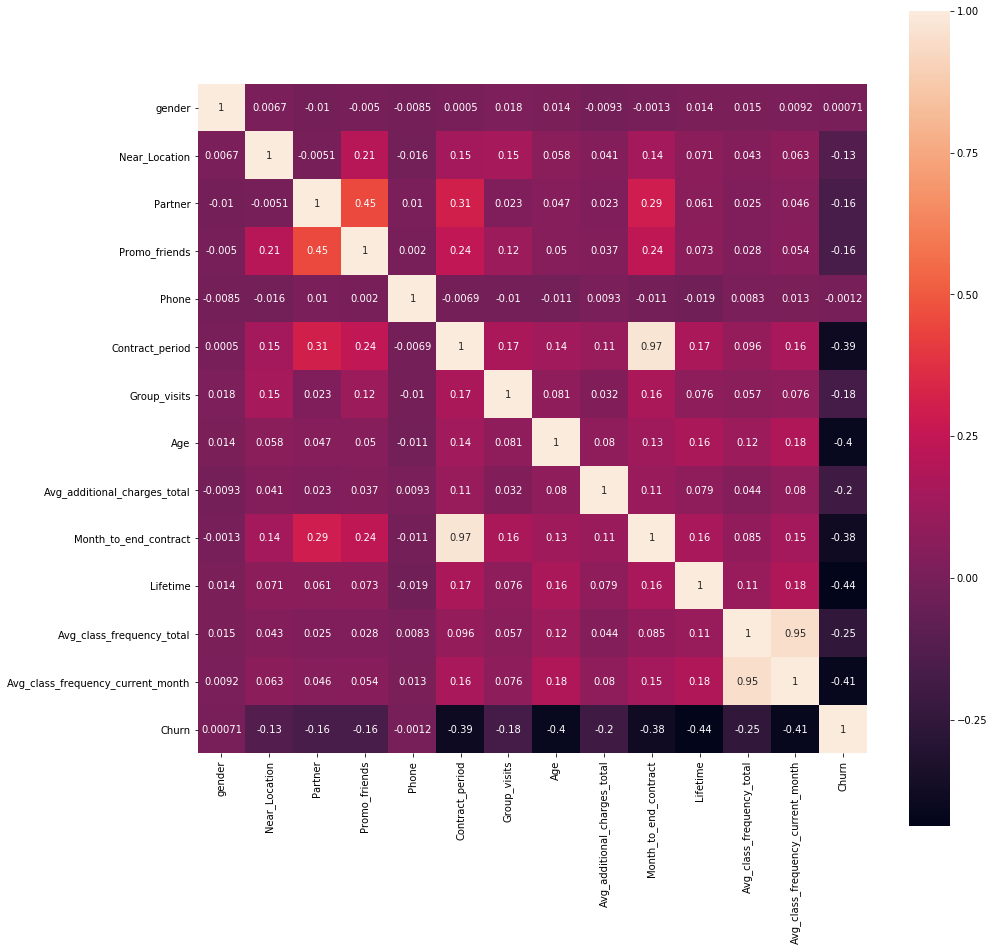

In [8]:
#построим и отрисуем матрицу корреляций
cm = gym_churn.corr() #вычисляем матрицу корреляций
fig, ax = plt.subplots(figsize=(15,15))

#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm,annot = True, square=True) #ваш код здесь
ax.set_ylim(14, 0) #корректировка "рваных" полей heatmap в последней версии библиотеки
plt.show()

Как и предполагалось раньше, частотные  и временные признаки можно сказать полностью коррелируют друг с другом: 'Avg_class_frequency_total' и 'Avg_class_frequency_current_month' имеют коэффициент равный 0,95; 'Contract_period' и
'Month_to_end_contract' имеют коэффициент равный 0,97. Поэтому следует при регрессии учитывать одинаковые веса.

Также можно отметить , что Phone и Gender не коррелируют с целевой переменной "churn" (их коэффициент корреляции почти равен 0), поэтому данные признаки не будем учитывать в анализе. 

Кроме того достаточно низкую корреляцию с целевой переменной имеют признаки 'Near_Location', 'Partner' и "Promo_friends"  (0.13, 0.16 и 0.16), а также такие признаки, как Group_visits и  'Avg_additional_charges_total' (0.18 и 0.2)

### Вывод

Таким образом по результатам проведенного анализа в виду 0 корреляции и похожести распределений и средних убираем такие признаки, как Phone и Gender, а также уберём 'Avg_additional_charges_total', так как распределения между группами по этому признаку были полностью идентичны. Убрав данные признаки, мы снизим вероятность переобучения модели. 

Ещё учтем признаки, которые коррелируют между собой с коэффициентом корреляции почти равным 1. Оставим для прогноза 'Contract_period'и Avg_class_frequency_current_month', а 'Avg_class_frequency_total' и 'Month_to_end_contract' уберём из совокупности признаков и не будем их считать предиктами. Такой выбор был сделан ввиду того, что 'Avg_class_frequency_total' и 'Month_to_end_contract' имеют более низкий коэффициент корреляции с целевой переменной(но это не гарантирует оптимальный вариант).  

## 3. Модель прогнозирования оттока пользователей <a id="model"></a>

Так как в конечном итоге нам надо предсказать  пользователь уйдёт или останется, то мы будем строить модель бинарной классификации.

In [9]:
#перед построение моделей удалим признаки из вывода прошлого пункта
gym_churn_good=gym_churn.drop(['Phone', 'gender', 'Avg_class_frequency_total', 'Month_to_end_contract'], axis=1)
gym_churn_good.head()

,Near_Location,Partner,Promo_friends,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_current_month,Churn
0,1,1,1,6,1,29,14.227470,3,0.000000,0
1,1,0,0,12,1,31,113.202938,7,1.910244,0
2,1,1,0,1,0,28,129.448479,2,1.736502,0
3,1,1,1,12,1,33,62.669863,2,3.357215,0
4,1,1,1,1,0,26,198.362265,3,1.120078,0


### 3.1. Построение модели бинарной классификации пользователей <a id="binary_classification"></a>       

Так как существуют множество способ для обучения модели, то для выбора наиболее выгодного способа обучение на train-выборке будем проводить двумя методами:логистической регрессией и случайным лесом.

In [10]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = gym_churn_good.drop(columns = ['Churn'])
y = gym_churn_good['Churn']
# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train) #обучаем scaler и одновременно трансформируем матрицу для обучающей выборки

# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

#### 3.1.1. Логистическая регрессия <a id="logistic_regression"></a>

In [11]:
# задайте алгоритм для нашей модели
lg_model = LogisticRegression()

# обучите модель
lg_model.fit(X_train, y_train)

# воспользуйтесь уже обученной моделью, чтобы сделать прогнозы
lg_predictions =  lg_model.predict(X_test)
# а также определим вероятность принадлежности объекта к первому или второму классу методом predict_proba()
lg_probabilities = lg_model.predict_proba(X_test)[:,1]

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### 3.1.2. Случайный лес <a id="random_forest"></a>

In [12]:
# задайте алгоритм для нашей модели
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) # Ваш код здесь
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions =rf_model.predict(X_test_st) 
# а также определим вероятность принадлежности объекта к первому или второму классу методом predict_proba()
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

### 3.2. Оценки метрик: accuracy, precision и recall <a id="metric"></a>

In [13]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

#### 3.2.1. Логистическая регрессия <a id="metric_logistic_regression"></a>

In [14]:
print_all_metrics(y_test, lg_predictions, lg_probabilities , title = 'Метрики для модели логистической регрессии:')

Метрики для модели логистической регрессии:
	Accuracy: 0.92
	Precision: 0.86
	Recall: 0.83
	ROC_AUC: 0.97


#### 3.2.2. Случайный лес <a id="metric_random_forest"></a>

In [15]:
print_all_metrics(y_test, rf_predictions, rf_probabilities , title = 'Метрики для модели случайного леса:')

Метрики для модели случайного леса:
	Accuracy: 0.91
	Precision: 0.85
	Recall: 0.78
	ROC_AUC: 0.96


### Вывод

На основе метрик, рассчитанных для каждой модели на основе валидационной выборке, можно сделать вывод, что для данной бинарной квалификации лучше подходит алгоритм логистической регрессии. Логистическая регрессия превзошла градиентный лес по всем метрикам. Особенно важно, что метрика ROC_AUC выше для логистической регрии, и равна 0.97!

## 4. Kластеризация пользователей <a id="claster"></a>

Кроме того сформируем типичные портреты пользователей: попробуем выделить несколько наиболее ярких групп и охарактеризовать их основные свойства. Для того чтобы выделить группы пользователей применим кластеризацию.

In [16]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = gym_churn.drop(columns = ['Churn'])

# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
x_st = scaler.fit_transform(X) #обучаем scaler и одновременно трансформируем матрицу для обучающей выборки

### 4.1 Построение дендограммы <a id="dendrogramma"></a> 

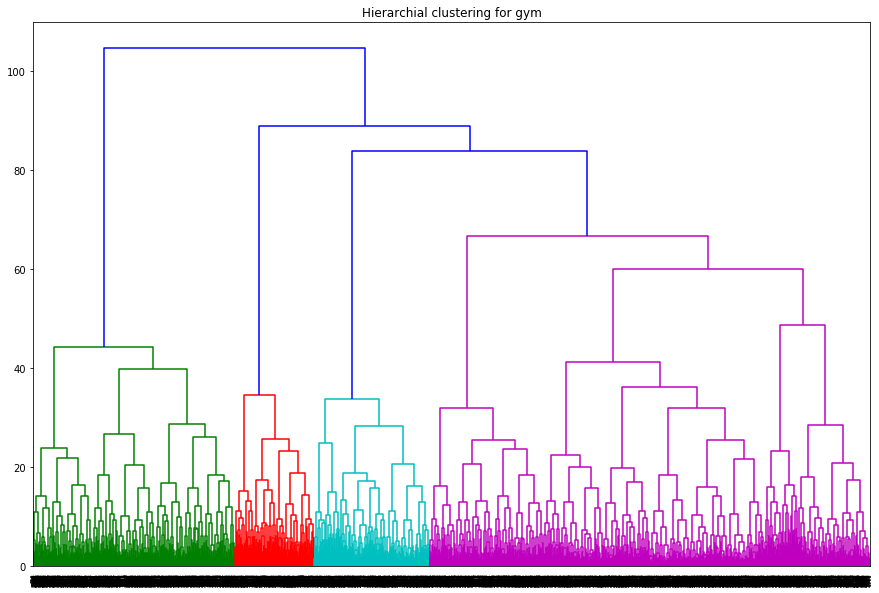

In [17]:
#Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков 
linked = linkage(x_st, method = 'ward')
#В переменной linked сохранена таблица «связок» между объектами. Визуализируем её, как дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for gym')
plt.show()

Предложенное оптимальное число кластеров 4 — четыре разных цветов на дендограмме,однако при необходимости можно поделить последний кластер ещё на 2-3 части.

### 4.2 Кластеризации на основании алгоритма K-Means  <a id="K_means"></a>

In [18]:
# задаём модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5, random_state=0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = km.fit_predict(x_st)
# присваиваем значение кластеров пользователям
gym_churn['cluster_km'] = labels

### 4.3 Исследование признаков кластеров <a id="features_claster"></a>

In [19]:
# выводим статистику по средним значениям наших признаков по кластеру
print(gym_churn.drop('Churn',axis=1).groupby(['cluster_km']).mean())

              gender  Near_Location   Partner  Promo_friends     Phone  \
cluster_km                                                               
0           0.502473       0.959446  0.783383       0.574679  1.000000   
1           0.522078       0.862338  0.470130       0.306494  0.000000   
2           0.495050       0.000000  0.463366       0.079208  1.000000   
3           0.485737       1.000000  0.350238       0.240095  1.000000   
4           0.560335       0.976105  0.356033       0.229391  0.998805   

            Contract_period  Group_visits        Age  \
cluster_km                                             
0                 10.884273      0.543027  29.980218   
1                  4.787013      0.425974  29.301299   
2                  2.352475      0.215842  28.477228   
3                  1.948494      0.341521  28.167987   
4                  2.665472      0.473118  30.127838   

            Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
cluster_km 

#### Вывод

Анализ кластеров по средним значениям признаков:
- 0 кластер - часто это сотрудник компании-партнёра клуба и человек из акции «приведи друга», а также живет или работает рядом с фитнесс-центром, соответственно они берут абонементы на долгое время (большее колличество берут на год-полгода), а также ходят на групповые занятии почти в половине случаев; 
- 1 кластер - не оставляют телефон, имеют среднестатистические показатели;
- 2 кластер - мало групповых занятий, живут далеко и редко являются участниками акции "приведи друга";
- 3 кластер - редко ходят в зал,малая суммарная выручка от других услуг,берут абонементы в большей степени на  месяц,находят рядом с фитнесс-центром;
- 4 кластер - преобладает Ж пол, самый высокий средний возраст, самая высокая средняя частота посещений. 

In [20]:
#выделим дискретные признаки в disc и непрерывные признаки в conti
disc=[]
conti=[]
for column in gym_churn.drop(['Churn','cluster_km'], axis=1).columns:
    if gym_churn[column].nunique()>3:
        conti.append(column)
    else:
        disc.append(column)  
print(conti)        
disc

['Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']


['gender',
 'Near_Location',
 'Partner',
 'Promo_friends',
 'Phone',
 'Contract_period',
 'Group_visits']

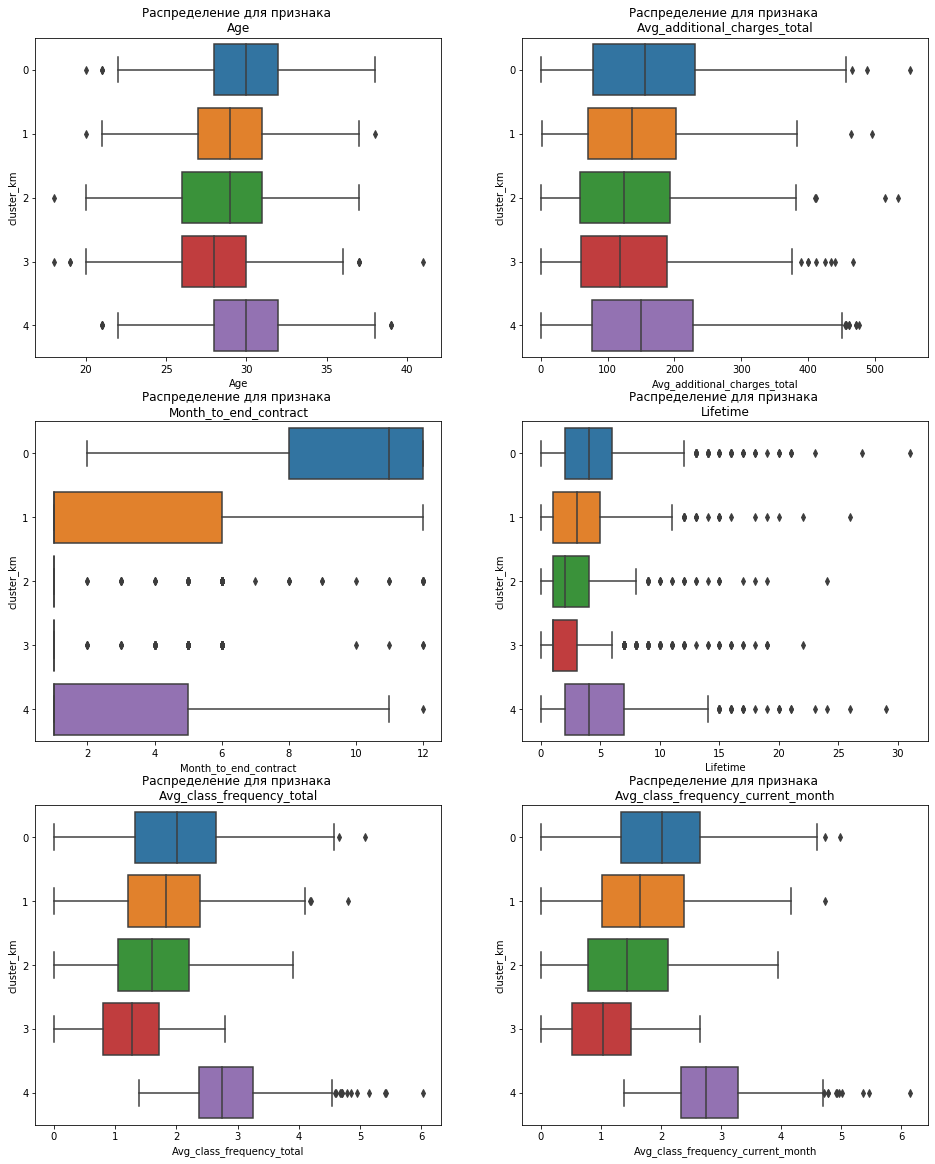

In [21]:
#строим распределения непрерывных признаков для всех кластеров методом boxplot()
for i, col in enumerate(conti):
    plt.subplot(3, 2, i+1)
    fig = plt.gcf()
    fig.set_size_inches(16, 20)
    sns.boxplot(data = gym_churn, x = col, y = 'cluster_km', orient = 'h')
    plt.title('Распределение для признака \n'+ str(col))

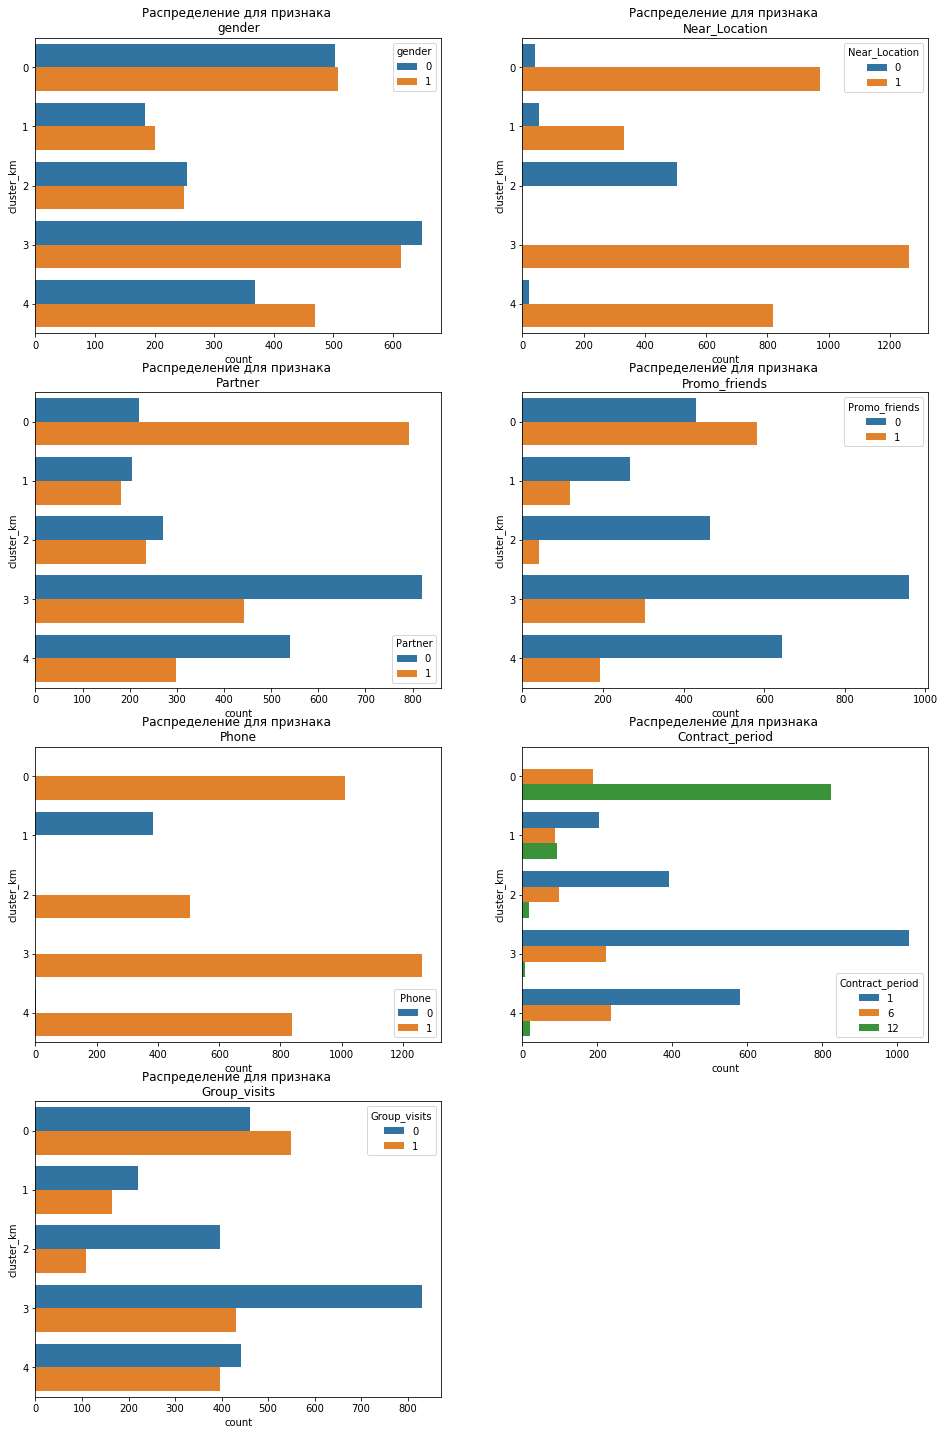

In [22]:
#строим распределения дискретных признаков для всех кластеров методом countplot()
for i, col in enumerate(disc):
    plt.subplot(4, 2, i+1)
    fig = plt.gcf()
    fig.set_size_inches(16, 25)
    sns.countplot(data = gym_churn, hue = col, y = 'cluster_km', orient = 'h')
    plt.title('Распределение для признака \n'+ str(col))

#### Вывод

Анализ кластеров по распределениям признаков:
- 0 кластер - часто это сотрудник компании-партнёра клуба и человек из акции «приведи друга», а также живет или работает рядом с фитнесцентром, берут абонементы на год-полгода, тратит самые большие суммы за доп.услуги; 
- 1 кластер - не оставляют телефон, имеют среднестатистические показатели;
- 2 кластер - многие не ходят на групповых занятий, живут далеко и редко являются участниками акции "приведи друга";
- 3 кластер - редко ходят в зал до одного случая в неделю ,малая суммарная выручка от других услуг,берут абонементы в большей степени на  месяц,находят рядом с фитнесс-центром;
- 4 кластер - преобладает Ж пол, самый высокий возраст, самая высокая частота посещений в стабильности.


### 4.4 Доля оттока <a id="exit"></a>

In [23]:
per=(gym_churn.groupby('cluster_km')
     .agg({'Churn':'sum','Contract_period':'count'})
     .rename({'Churn':"count_churn",'Contract_period':"count_users"}, axis=1))
per['per_churn']=per['count_churn']/per['count_users']
per

,count_churn,count_users,per_churn
cluster_km,,,
0,28,1011,0.027695
1,103,385,0.267532
2,224,505,0.443564
3,649,1262,0.514263
4,57,837,0.068100


### Вывод

Я бы сказала, что явно выделяются только четыре класса пользователей (1 класс выделяется, только тем что в принципе люди не оставляли телефон). Больше всего в отток уходи люди из 3 класса: берут абонемент на месяц чаще всего, мало тратят,очень редко посещают и находятся рядом. Меньше всего в отток уходят люди возрастной категорией, в которой многие имеют возраст в районе 30  и больше, и кто часто посещает зал-класс 4; либо люди, которые имеют бонусы от работы или приходят по акции и также щеры на траты в сети центра-класс 0 .Также достаточно много уходит в отток людей из класса под номером 2- это люди, которых никто не приглашал и они не имели скидки, они вынуждены ездить из далека и редко учавствуют в групповых занятиях(таким людям нужна мотивация). 

## Общий вывод и рекомендации <a id="conclusion"></a> 

В ходе работы проекта была создана модель бинарной классификации, которая прогназирует вероятность оттока для каждого клиента на уровне следующего месяца.
Наиболее влияющими признаками являются - частота хождения в зал в течении недели, дальность расположения,возраст, длительность абонемента и денеги, которые тратит клиент на свои потребности внутри фитнесс-центра; а вот пол и номер телефона-никакого влияния не оказывают. Также неплохим бонусом является бонусы ввиде акций.

Также были получены портреты пользователей на основе, которых можно выдвинуть пару идей для удержания клиентов и уменьшения оттока. Так больше всего люди уходят, которые покупают абонемент на один месяц, ходят соответсвенно редко (1-2 раза в неделю), живут далеко и не имеют друзей внутри сети, следовательно, можно предложить следующие стратегии:

- В расширить акцию "Привести Друга"-когда приглаешь кого-то в сеть,ты не только даришь другому человеку промокод, но и получаешь сам скидку на продление абонемента (так человек будет замотивирован остаться хотя бы на следующий месяц, а также появится товарищЮ с которым он вместе сможет ходить с большим позитивом);
- Можно сделать акцию для новичков "скидка на занятия с тренером на месяц", чтобы втянуть человека в процесс или 3 бесплатных занятиядля введения в курс дела;
- Также часть групповых занятий должна быть включена в абонемент бесплатно, так как многие люди втягиваются в массовые тренировки, но для этого им надо это попробывать;
- Для людей, что живут далеко, нужно провести анкетирование, возможно, они не знают,что есть более близкий фитнесс-центр вашей сети, так человек будет более замотивирован ходить (больше не надо будет страдать в дороге вместе с потерем времени).